In [1]:
%load_ext autoreload
%autoreload 2

import model_library as ml
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import shutil
import os

In [2]:
params_rf = { 
    'n_estimators': [50, 100], 
    'max_features': [ None], 
    'max_depth': [3, 5, 7, 10, 12], 
    'max_leaf_nodes': [3, 6, 9, None], 
}
params_dt = {
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [3, 5, 10, 15, 20],
    'max_features': ['sqrt', 'log2', None],
}

features_baseline_1 = ['Re', 'Rct']
features_baseline_2 = ['capacity']

In [ ]:
# Raw Data from: https://www.kaggle.com/datasets/patrickfleith/nasa-battery-dataset

In [3]:
test = ml.ModelLibrary('../Datasets/nasa/clean_cycles.csv')

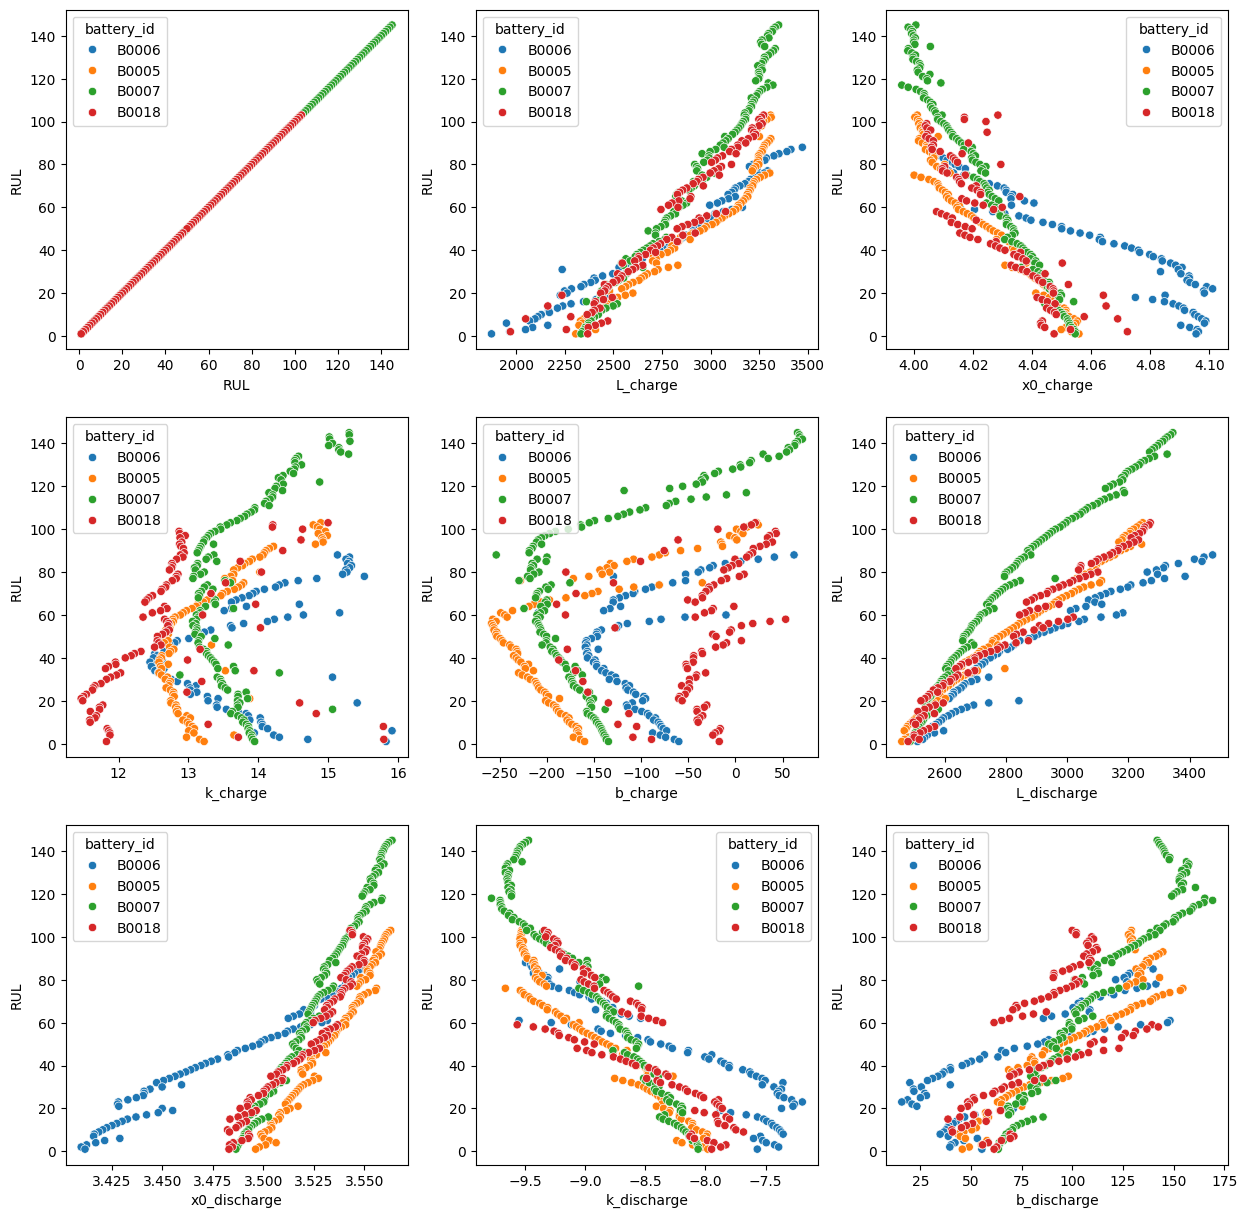

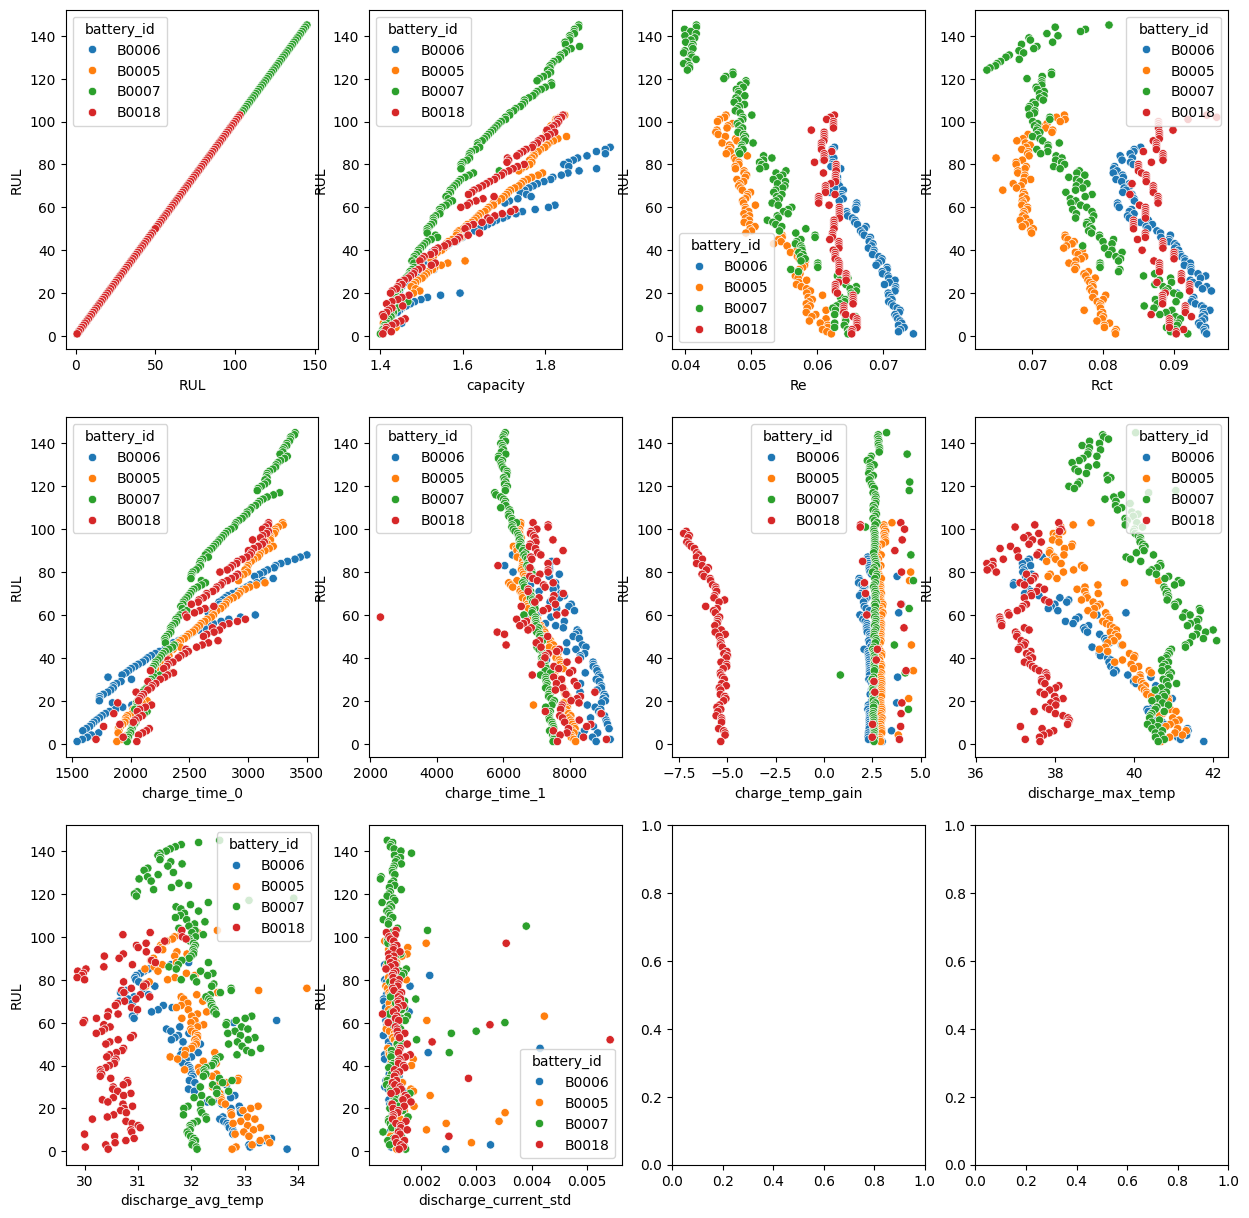

In [4]:
# correlation plots for general and imputed features
#  general features
features_corr = ['RUL',
            'capacity',
            'Re', 
            'Rct', 
            'charge_time_0', 
            'charge_time_1', 
            'charge_temp_gain', 
            'discharge_max_temp', 
            'discharge_avg_temp',
            'discharge_current_std',
            'battery_id'
            ]
# imputed features
features_corr2 = ['RUL',
                  'L_charge',
                  'x0_charge',
                  'k_charge',
                  'b_charge',
                  'L_discharge',
                  'x0_discharge',
                  'k_discharge',
                  'b_discharge',
                  'battery_id'
                  ]

# correlation plots
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, feature in enumerate(features_corr2[:-1]):
    sns.scatterplot(x=feature, y='RUL', data=test.data, hue='battery_id', ax=ax[i//3, i%3])
plt.show()

fig, ax = plt.subplots(3, 4, figsize=(15, 15))
for i, feature in enumerate(features_corr[:-1]):
    sns.scatterplot(x=feature, y='RUL', data=test.data, hue='battery_id', ax=ax[i//4, i%4])
plt.show()

In [5]:
# baseline features set 1

# test.lin_reg(features_baseline_1, plot=False, write_scores=False)
# test.dt(features_baseline_1, plot=False, write_scores=False)
# test.dt(features_baseline_1, plot=False, write_scores=False, params=params_dt)
# test.rf(features_baseline_1, plot=False, write_scores=False)
# test.rf(features_baseline_1, plot=False, write_scores=False, params=params_rf)
# test.nn(features_baseline_1, plot=False, write_scores=False, simple=True)
# test.nn(features_baseline_1, plot=False, write_scores=False, simple=False)

In [6]:
# baseline features set 2

# test.lin_reg(features_baseline_2, plot=True, write_scores=True)
# test.dt(features_baseline_2, plot=True, write_scores=True)
# test.dt(features_baseline_2, plot=True, write_scores=True, params=params_dt)
# test.rf(features_baseline_2, plot=True, write_scores=True)
# test.rf(features_baseline_2, plot=True, write_scores=True, params=params_rf)
# test.nn(features_baseline_2, plot=True, write_scores=True, simple=True)
# test.nn(features_baseline_2, plot=True, write_scores=True, simple=False)

In [7]:
feature_set_1 = [
    'capacity',
    'charge_time_0',
    'charge_time_1',
    'discharge_max_temp',
    'discharge_avg_temp',
]
feature_set_2 = [
    'L_charge',
    'b_charge',
    'k_charge',
    'x0_charge',
    'L_discharge',
    'b_discharge',
    'k_discharge',
    'x0_discharge',
]

test.clear_scores()

In [8]:
f1_linreg = test.lin_reg(feature_set_1, plot=False, write_scores=True, return_model=True)
f1_dt1 = test.dt(feature_set_1, plot=False, write_scores=True, return_model=True)
f1_dt2 = test.dt(feature_set_1, plot=False, write_scores=True, params=params_dt, return_model=True)
f1_rf1 = test.rf(feature_set_1, plot=False, write_scores=True, return_model=True)
f1_rf2 = test.rf(feature_set_1, plot=False, write_scores=True, params=params_rf, return_model=True)
f1_nn1 = test.nn(feature_set_1, plot=False, write_scores=True, simple=True, return_model=True)
f1_nn2 = test.nn(feature_set_1, plot=False, write_scores=True, simple=False, return_model=True)

Linear Regression Results: 
Training R2: 0.9180766331796806
Test R2: 0.9386576594650751
Decision Tree Results: 
Training R2: 0.9208718485939877
Train MAE: 6.250241281852224
Test R2: 0.9466939990080209
Test MAE: 6.294524944752218
Best parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 2}
Decision Tree Results (Tuned): 
Training R2: 0.9287780116692653
Train MAE: 5.97789304435928
Test R2: 0.9486644003588207
Test MAE: 5.7254545454545465
Random Forest Results: 
Training R2: 0.9480898081381077
Train MAE: 5.497845089199347
Test R2: 0.9647985422151533
Test MAE: 5.055141014980437
Best parameters: {'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'n_estimators': 50}
Random Forest Results (Tuned): 
Training R2: 0.9570726882249873
Train MAE: 4.638690981214461
Test R2: 0.9659388134456165
Test MAE: 4.474777638018548
11/11 [==============================] - 0s 38us/step
Neural Network Results: 
Training R2: 0.9570917903052585
Train MAE: 5.222

In [9]:
f2_linreg = test.lin_reg(feature_set_2, plot=False, write_scores=True, return_model=True)
f2_dt1 = test.dt(feature_set_2, plot=False, write_scores=True, return_model=True)
f2_dt2 = test.dt(feature_set_2, plot=False, write_scores=True, params=params_dt, return_model=True)
f2_rf1 = test.rf(feature_set_2, plot=False, write_scores=True, return_model=True)
f2_rf2 = test.rf(feature_set_2, plot=False, write_scores=True, params=params_rf, return_model=True)
f2_nn1 = test.nn(feature_set_2, plot=False, write_scores=True, simple=True, return_model=True)
f2_nn2 = test.nn(feature_set_2, plot=False, write_scores=True, simple=False, return_model=True)

Linear Regression Results: 
Training R2: 0.8580700462891001
Test R2: 0.8591073781217982
Decision Tree Results: 
Training R2: 0.9183825828860718
Train MAE: 6.204749435402271
Test R2: 0.9209592512358631
Test MAE: 6.278242540287995
Best parameters: {'max_depth': 7, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Decision Tree Results (Tuned): 
Training R2: 0.9261806617546134
Train MAE: 6.071831026353978
Test R2: 0.9213165576957465
Test MAE: 6.090034132534133
Random Forest Results: 
Training R2: 0.9321950631516209
Train MAE: 5.986709003377747
Test R2: 0.946813860164169
Test MAE: 6.147999262049965
Best parameters: {'max_depth': 12, 'max_features': None, 'max_leaf_nodes': None, 'n_estimators': 100}
Random Forest Results (Tuned): 
Training R2: 0.9442291946938006
Train MAE: 4.936530683456342
Test R2: 0.9590555505251306
Test MAE: 4.795896831043288
11/11 [==============================] - 0s 0s/step
Neural Network Results: 
Training R2: 0.8958691542431927
Train MAE: 7.133214

In [10]:
# Models for full set of given/imputed features (NOT USED)

# test.lin_reg(feature_set_1+feature_set_2, plot=True, write_scores=True)
# test.dt(feature_set_1+feature_set_2, plot=True, write_scores=True)
# test.dt(feature_set_1+feature_set_2, plot=True, write_scores=True, params=params_dt)
# test.rf(feature_set_1+feature_set_2, plot=True, write_scores=True)
# test.rf(feature_set_1+feature_set_2, plot=True, write_scores=True, params=params_rf)
# test.nn(feature_set_1+feature_set_2, plot=True, write_scores=True, simple=True)
# test.nn(feature_set_1+feature_set_2, plot=True, write_scores=True, simple=False)

In [11]:
test.scores

Model                                           Features  \
0   Linear Regression  [capacity, charge_time_0, charge_time_1, disch...   
1       Decision Tree  [capacity, charge_time_0, charge_time_1, disch...   
2       Decision Tree  [capacity, charge_time_0, charge_time_1, disch...   
3       Random Forest  [capacity, charge_time_0, charge_time_1, disch...   
4       Random Forest  [capacity, charge_time_0, charge_time_1, disch...   
5      Neural Network  [capacity, charge_time_0, charge_time_1, disch...   
6      Neural Network  [capacity, charge_time_0, charge_time_1, disch...   
7   Linear Regression  [L_charge, b_charge, k_charge, x0_charge, L_di...   
8       Decision Tree  [L_charge, b_charge, k_charge, x0_charge, L_di...   
9       Decision Tree  [L_charge, b_charge, k_charge, x0_charge, L_di...   
10      Random Forest  [L_charge, b_charge, k_charge, x0_charge, L_di...   
11      Random Forest  [L_charge, b_charge, k_charge, x0_charge, L_di...   
12     Neural Network  [L_charge, b_charge, k_charge, x0_charge, L_di...   
13     Neural Network  [L_charge, b_charge, k_charge, x0_charge, L_di...   

                                           Parameters  R2_train  MAE_train  \
0                                                None  0.918077   7.386552   
1       {'min_samples_split': 15, 'random_state': 30}  0.920872   6.250241   
2   {'max_depth': 10, 'max_features': None, 'min_s...  0.928778   5.977893   
3   {'n_estimators': 50, 'max_depth': 5, 'random_s...  0.948090   5.497845   
4   {'max_depth': 10, 'max_features': None, 'max_l...  0.957073   4.638691   
5                      {'layer_1': 64, 'layer_2': 64}  0.957092   5.222743   
6   {'num_layers': 3, 'units0': 60, 'units1': 140,...  0.976367   3.480234   
7                                                None  0.858070   9.923155   
8       {'min_samples_split': 15, 'random_state': 30}  0.918383   6.204749   
9   {'max_depth': 7, 'max_features': None, 'min_sa...  0.926181   6.071831   
10  {'n_estimators': 50, 'max_depth': 5, 'random_s...  0.932195   5.986709   
11  {'max_depth': 12, 'max_features': None, 'max_l...  0.944229   4.936531   
12                     {'layer_1': 64, 'layer_2': 64}  0.895869   7.133214   
13  {'num_layers': 3, 'units0': 190, 'units1': 90,...  0.969175   3.680631   

     R2_test   MAE_test  query_time  train_time  
0   0.938658   7.075418    0.000611    0.000996  
1   0.946694   6.294525    0.000631    0.000000  
2   0.948664   5.725455    0.000598    0.000000  
3   0.964799   5.055141    0.001714    0.098120  
4   0.965939   4.474778    0.001682    0.124476  
5   0.888109   6.996238    0.036353    2.997747  
6   0.968519   4.551815    0.038800    4.612164  
7   0.859107  11.175150    0.000557    0.000073  
8   0.920959   6.278243    0.000584    0.000000  
9   0.921317   6.090034    0.000584    0.016621  
10  0.946814   6.147999    0.001776    0.125603  
11  0.959056   4.795897    0.002704    0.366461  
12  0.865226   9.914354    0.037941    2.918827  
13  0.965107   4.441828    0.039883    5.087922

In [12]:
# test.write_scores('feature_models.csv')

In [13]:
# create a weighted score of each model based on the R2 score/MAE/and query time
data = test.scores.copy()

r2_weight = 0.8
mae_weight = 0.6
query_time_weight = 0.2
train_time_weight = 0.2

# normalize the data
data['R2_test'] = data['R2_test'] / data['R2_test'].max()
data['MAE_test'] = data['MAE_test'] / data['MAE_test'].max()
data['query_time'] = data['query_time'] / data['query_time'].max()
data['train_time'] = data['train_time'] / data['train_time'].max()

data['score'] = (r2_weight * data['R2_test'] - mae_weight * data['MAE_test'] - query_time_weight * data['query_time']
                  - train_time_weight * data['train_time'])*1.8
data = data.sort_values('score', ascending=False)

display(data)

Model                                           Features  \
4       Random Forest  [capacity, charge_time_0, charge_time_1, disch...   
3       Random Forest  [capacity, charge_time_0, charge_time_1, disch...   
11      Random Forest  [L_charge, b_charge, k_charge, x0_charge, L_di...   
2       Decision Tree  [capacity, charge_time_0, charge_time_1, disch...   
1       Decision Tree  [capacity, charge_time_0, charge_time_1, disch...   
10      Random Forest  [L_charge, b_charge, k_charge, x0_charge, L_di...   
9       Decision Tree  [L_charge, b_charge, k_charge, x0_charge, L_di...   
8       Decision Tree  [L_charge, b_charge, k_charge, x0_charge, L_di...   
0   Linear Regression  [capacity, charge_time_0, charge_time_1, disch...   
6      Neural Network  [capacity, charge_time_0, charge_time_1, disch...   
13     Neural Network  [L_charge, b_charge, k_charge, x0_charge, L_di...   
7   Linear Regression  [L_charge, b_charge, k_charge, x0_charge, L_di...   
5      Neural Network  [capacity, charge_time_0, charge_time_1, disch...   
12     Neural Network  [L_charge, b_charge, k_charge, x0_charge, L_di...   

                                           Parameters  R2_train  MAE_train  \
4   {'max_depth': 10, 'max_features': None, 'max_l...  0.957073   4.638691   
3   {'n_estimators': 50, 'max_depth': 5, 'random_s...  0.948090   5.497845   
11  {'max_depth': 12, 'max_features': None, 'max_l...  0.944229   4.936531   
2   {'max_depth': 10, 'max_features': None, 'min_s...  0.928778   5.977893   
1       {'min_samples_split': 15, 'random_state': 30}  0.920872   6.250241   
10  {'n_estimators': 50, 'max_depth': 5, 'random_s...  0.932195   5.986709   
9   {'max_depth': 7, 'max_features': None, 'min_sa...  0.926181   6.071831   
8       {'min_samples_split': 15, 'random_state': 30}  0.918383   6.204749   
0                                                None  0.918077   7.386552   
6   {'num_layers': 3, 'units0': 60, 'units1': 140,...  0.976367   3.480234   
13  {'num_layers': 3, 'units0': 190, 'units1': 90,...  0.969175   3.680631   
7                                                None  0.858070   9.923155   
5                      {'layer_1': 64, 'layer_2': 64}  0.957092   5.222743   
12                     {'layer_1': 64, 'layer_2': 64}  0.895869   7.133214   

     R2_test  MAE_test  query_time  train_time     score  
4   0.997336  0.400422    0.042167    0.024465  0.979720  
3   0.996159  0.452356    0.042978    0.019285  0.923510  
11  0.990229  0.429157    0.067791    0.072026  0.912106  
2   0.979500  0.512338    0.015005    0.000000  0.851753  
1   0.977466  0.563261    0.015819    0.000000  0.793534  
10  0.977590  0.550149    0.044541    0.024687  0.788646  
9   0.951263  0.544962    0.014635    0.003267  0.774816  
8   0.950895  0.561804    0.014642    0.000000  0.757269  
0   0.969168  0.633139    0.015319    0.000196  0.706227  
6   1.000000  0.407316    0.972835    0.906493  0.323541  
13  0.996478  0.397474    1.000000    1.000000  0.285656  
7   0.887032  1.000000    0.013961    0.000014  0.192295  
5   0.916977  0.626053    0.911501    0.589189  0.104060  
12  0.893350  0.887179    0.951315    0.573678 -0.220726

In [14]:
# write data to csv
# data.to_csv('feature_models_scored.csv')

In [15]:
# examine feature importance for higher performing models
f1_models = [f1_dt2, f1_rf2]
f2_models = [f2_dt1, f2_rf2]
f1_model_names = ['DT', 'RF']
f2_model_names = ['DT', 'RF']

f1_feature_importance = pd.DataFrame()
f2_feature_importance = pd.DataFrame()

for i, model in enumerate(f1_models):
    f1_feature_importance[f1_model_names[i]] = model.feature_importances_
    f1_feature_importance.index = feature_set_1

for i, model in enumerate(f2_models):
    f2_feature_importance[f2_model_names[i]] = model.feature_importances_
    f2_feature_importance.index = feature_set_2

display(f1_feature_importance)
display(f2_feature_importance)



DT        RF
capacity            0.075069  0.077861
charge_time_0       0.820220  0.781798
charge_time_1       0.053068  0.095663
discharge_max_temp  0.041177  0.034755
discharge_avg_temp  0.010465  0.009922

DT        RF
L_charge      0.739753  0.576273
b_charge      0.012543  0.015939
k_charge      0.011225  0.013582
x0_charge     0.010710  0.094343
L_discharge   0.038309  0.040963
b_discharge   0.005780  0.026002
k_discharge   0.139688  0.122917
x0_discharge  0.041993  0.109980

Linear Regression Results: 
Training R2: 0.7319153687155463
Test R2: 0.7338293275406244


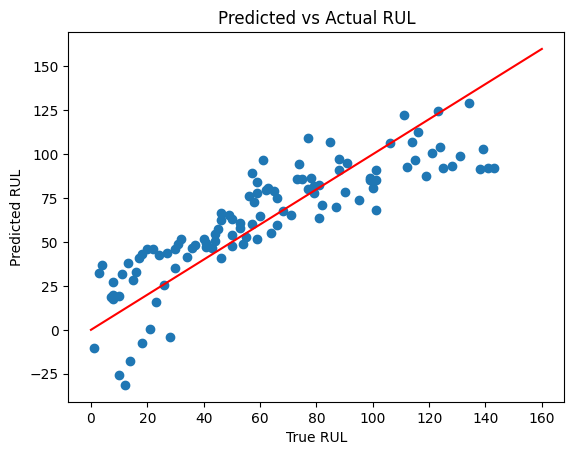

Decision Tree Results: 
Training R2: 0.6005536077333861
Train MAE: 16.34226728919143
Test R2: 0.6853907682374676
Test MAE: 16.819421487603304


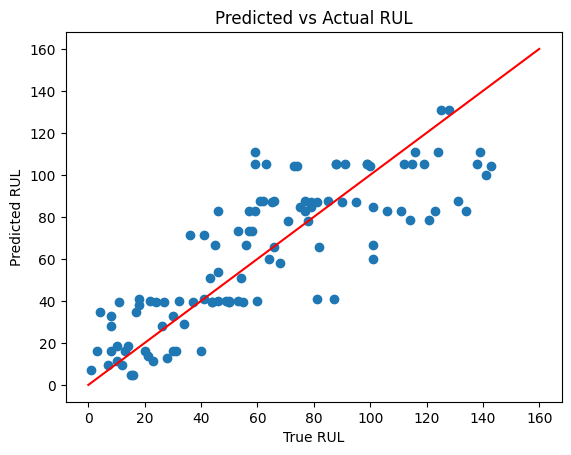

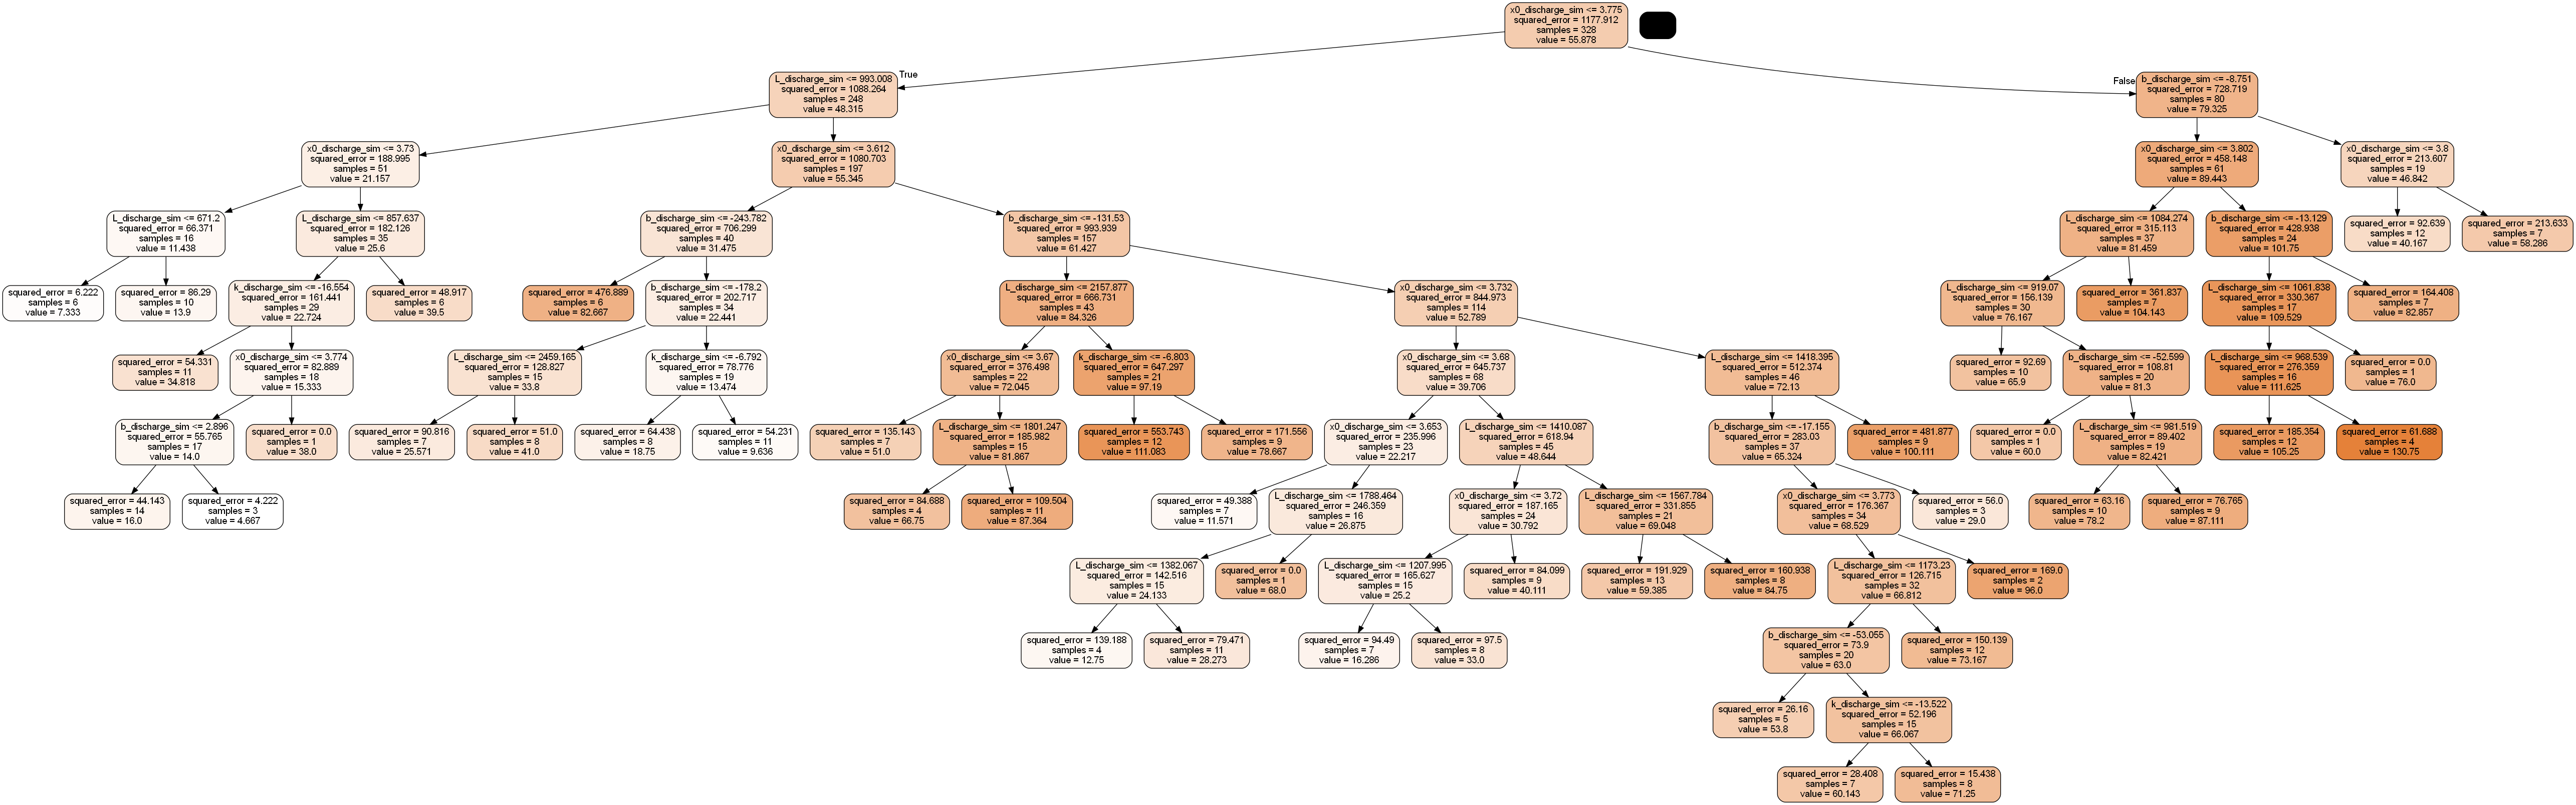

Best parameters: {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 2}
Decision Tree Results (Tuned): 
Training R2: 0.6274416505123526
Train MAE: 15.002624333729793
Test R2: 0.7146310483667321
Test MAE: 16.30727272727273


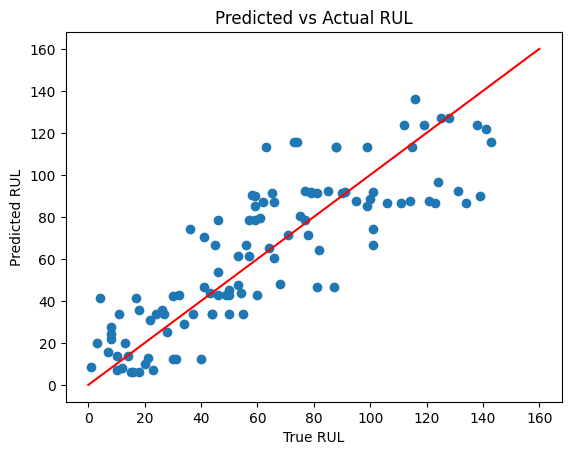

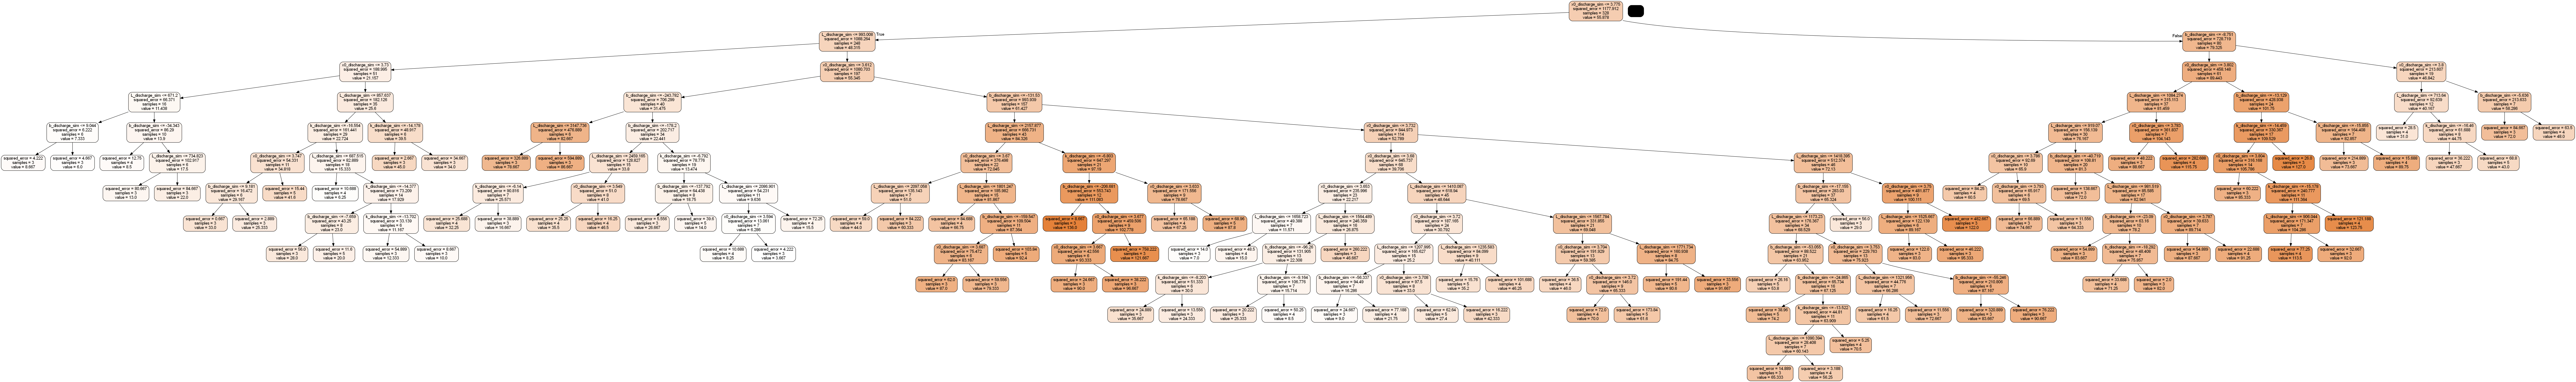

Random Forest Results: 
Training R2: 0.6907108823283402
Train MAE: 14.078874485083263
Test R2: 0.7144591928931717
Test MAE: 15.186427891356756


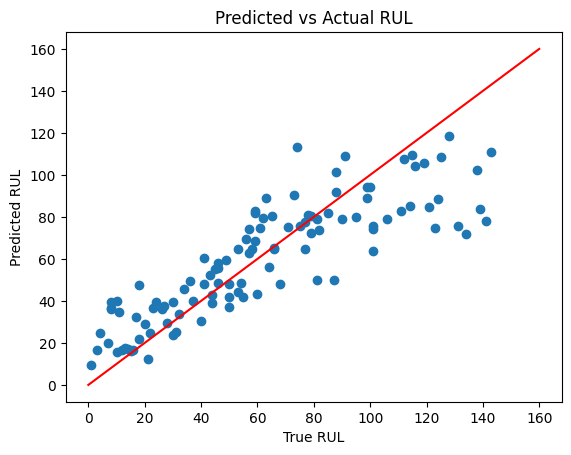

Best parameters: {'max_depth': 12, 'max_features': None, 'max_leaf_nodes': None, 'n_estimators': 100}
Random Forest Results (Tuned): 
Training R2: 0.7885066693956436
Train MAE: 11.603476801345991
Test R2: 0.7875544105666928
Test MAE: 13.12641492724447


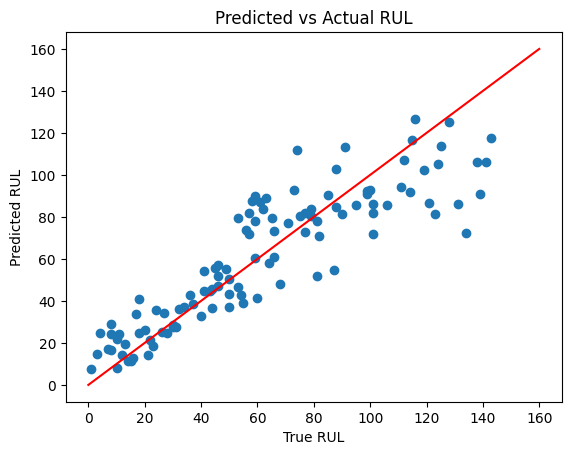

11/11 [==============================] - 0s 268us/step
Neural Network Results: 
Training R2: 0.822218841192612
Train MAE: 11.381967096067056
Test R2: 0.8226597436419575
Test MAE: 12.910295549306003
Using default tuner for Neural Network
1/1 [==============================] - 0s 14ms/step


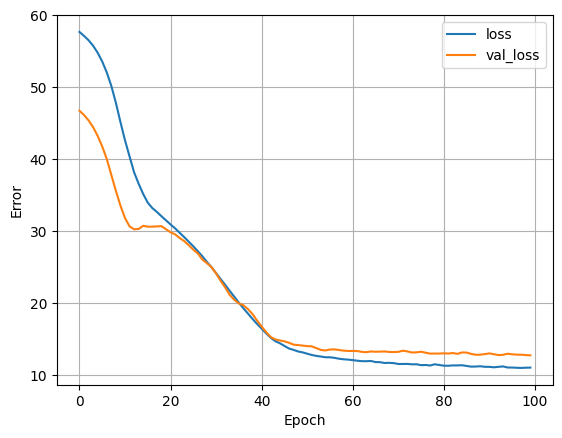

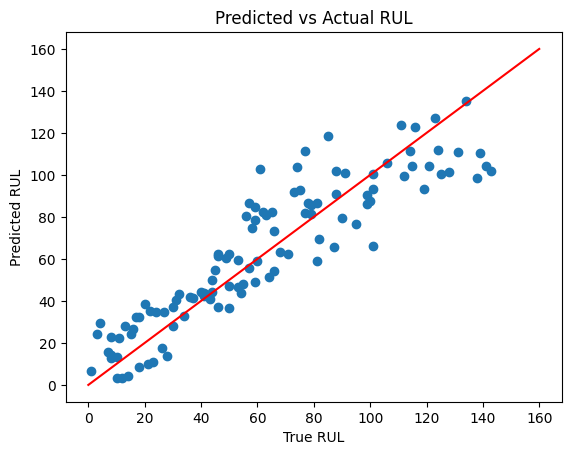

Using default tuner for Neural Network
{'num_layers': 3, 'units0': 120, 'units1': 180, 'units2': 170, 'tuner/epochs': 10, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}
Best epoch: 148
11/11 [==============================] - 0s 0s/step
Neural Network Results (Tuned): 
Train R2: 0.8817138804419605
Train MAE: 8.681805940662942
Test R2: 0.8447673566349867
Test MAE: 11.469137365167791
1/1 [==============================] - 0s 21ms/step


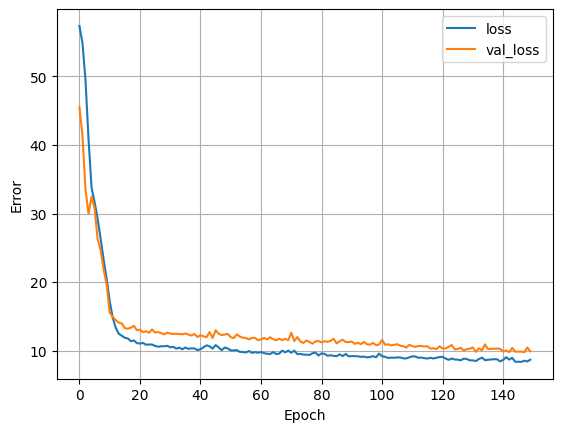

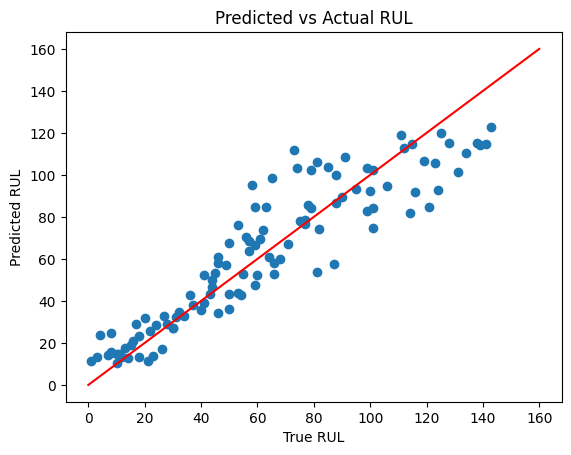

In [16]:
# NOT USED FOR PROJECT

# model set for simulated discharge curve
# feature_set_3 = ['L_discharge_sim', 'b_discharge_sim', 'k_discharge_sim', 'x0_discharge_sim']

# f3_linreg = test.lin_reg(feature_set_3, plot=True, write_scores=True, return_model=True)
# f3_dt1 = test.dt(feature_set_3, plot=True, write_scores=True, return_model=True)
# f3_dt2 = test.dt(feature_set_3, plot=True, write_scores=True, params=params_dt, return_model=True)
# f3_rf1 = test.rf(feature_set_3, plot=True, write_scores=True, return_model=True)
# f3_rf2 = test.rf(feature_set_3, plot=True, write_scores=True, params=params_rf, return_model=True)
# f3_nn1 = test.nn(feature_set_3, plot=True, write_scores=True, simple=True, return_model=True)
# f3_nn2 = test.nn(feature_set_3, plot=True, write_scores=True, simple=False, return_model=True)

In [20]:
# test.write_scores('all_feature_models.csv')